# **ติดตั้ง Library ที่ใช้ในการทำ Wordcloud**
- wordcloud เป็น Library ในการสร้าง Wordcloud
- pythainlp ซึ่งเป็น Library ในนการประมวลผลข้อมูลภาษาไทย ตัดคำศัพท์หรือประโยคภาษาไทย

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 21.7 MB/s 


# **นำเข้า Module ต่างๆที่ใช้สำหรับการสร้าง Word Cloud**

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud 
import pandas as pd 
import matplotlib.pyplot as plt 
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from google.colab import drive

# **นำข้อมูลข่าวเข้าเป็น Dataframe และรูปแบบตัวอักษร ก่อนการสร้าง Word Cloud**

In [ ]:
news = pd.read_csv("../Data/EV_BASE.csv")

In [ ]:
path_font = "../Fonts/THSarabunNew Bold.ttf"

In [ ]:
news.head()

,title,content,category,author,date
0,The Crown ซีซันสุดท้ายจะเล่าเรื่องราวการเสียชี...,Netflix เปิดตัวซีรีส์ The Crown ซีซัน 5 อย่าง...,"['TV & Entertainment', 'POP']",พิมพ์ คำภีร์,2022-11-27
1,OR เปิดโอกาสหาพันธมิตร ขยายธุรกิจใหม่ โฟกัสสุข...,OR เร่งขยายธุรกิจใหม่ โฟกัส Health & Wellness...,"['Business', 'Business']",จิรันธนิน ภูพนาแสง,2022-11-18
2,‘VinFast’ จับมือ ‘Autonomy’ จัดหารถยนต์ไฟฟ้า 2...,VinFast ซึ่งเป็นผู้ผลิตรถยนต์ไฟฟ้าของเวียดนาม...,"['Business', 'Business']",THE STANDARD WEALTH,2022-11-18
3,พร้อมกันหรือยัง? ‘Great Wall Motor’ เตรียมเปิด...,Great Wall Motor เตรียมเปิดตัว ORA Grand Cat ...,"['Business', 'Business']",THE STANDARD WEALTH,2022-11-17
4,‘Lucid Motors’ สตาร์ทอัพรถยนต์ไฟฟ้าขอท้าชน Tes...,‘Lucid Motors’ หนึ่งในบริษัทสตาร์ทอัพรถยนต์ไฟ...,"['Business', 'Tech']",อรุณ เหล่าสิล,2022-11-17


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     149 non-null    object
 1   content   148 non-null    object
 2   category  149 non-null    object
 3   author    149 non-null    object
 4   date      149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


# **ขั้นตอนการสร้าง Word Cloud**

**1.ในคอลัมน์ title แบ่งแต่ละคำด้วย " "**

In [ ]:
text = " ".join(i for i in news.title)

In [ ]:
text = ''
for row in news.title:
    text = text + row.lower() + ' '

**2.ใช้ฟังก์ชัน word_tokenize ในการตัดคำ Word, Sentence ที่ถูกต้อง ก่อนการนำข้อมูลคำศัพท์ ไปสร้าง Word Cloud**

In [ ]:
wt = word_tokenize(text, engine='newmm')

**3.ตั้งค่าการแสดงผลของ Word Cloud**
- font_path คือ Font ที่ต้องการใช้ใน Word Cloud ในที่นี้ได้นำเข้า Font THSarabunNew ตั้งแต่ข้างต้น
- max_words คือ จำนวนคำที่ต้องการจะแสดงใน Word Cloud
- background_color คือ สีพื้นหลังที่ต้องการแสดง Word Cloud

In [ ]:
wordcloud = WordCloud(
                      font_path=path_font, # font ที่เราต้องการใช้ในการแสดงผล เราเลือกใช้ THSarabunNew 
                      stopwords=thai_stopwords(), # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                      relative_scaling=0.3,
                      min_font_size=1,
                      background_color = "white",
                      width=1024,
                      height=768,
                      max_words=200, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      collocations=False,
                      regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                      margin=2
                      ).generate(' '.join(wt))

**4.แสดงผล Word Cloud** 

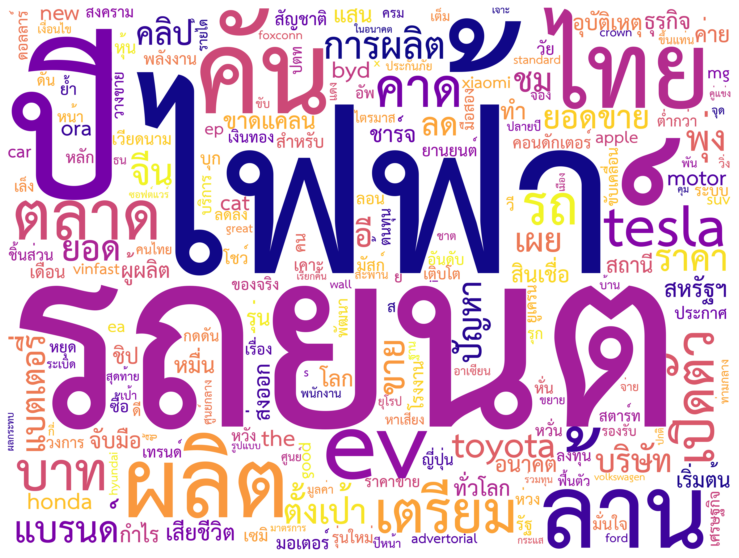

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()